# JM0250 Data Visualization 
### Academic year 2022-2023

## FIFA World Cup 2022 Data Exploration
Data sources:

- FIFA World Cup 2022 Player Data (https://www.kaggle.com/datasets/swaptr/fifa-world-cup-2022-player-data)
- FIFA World Cup 2022 Match Data (https://www.kaggle.com/datasets/swaptr/fifa-world-cup-2022-match-data)
- FIFA World Cup 2022 Team Data (https://www.kaggle.com/datasets/swaptr/fifa-world-cup-2022-statistics)
- FIFA World Cup 2022 Twitter Dataset (https://www.kaggle.com/datasets/kumari2000/fifa-world-cup-twitter-dataset-2022)
- FIFA World Cup 2022 Prediction (https://www.kaggle.com/datasets/shilongzhuang/soccer-world-cup-challenge)
- FIFA World Cup 2022 Player Images (https://www.kaggle.com/datasets/soumendraprasad/fifa-2022-all-players-image-dataset)
- FIFA World Cup Historic (https://www.kaggle.com/datasets/piterfm/fifa-football-world-cup)
- FIFA World Cup Penalty Shootouts (https://www.kaggle.com/datasets/pablollanderos33/world-cup-penalty-shootouts, https://www.kaggle.com/datasets/jandimovski/world-cup-penalty-shootouts-2022)

Data dictionaries and additional info can be found in the respective data folders.

In [ ]:
# Import libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

# Do not truncate tables
pd.set_option('display.max_columns', None)

: 

In [ ]:
# Load the data

# Match data
df_match_data = pd.read_csv('../Data/FIFA World Cup 2022 Match Data/data.csv', delimiter=',')

# Player data
df_player_defense       = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_defense.csv', delimiter=',')
df_player_gca           = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_gca.csv', delimiter=',')
df_player_keepers       = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_keepers.csv', delimiter=',')
df_player_keepersadv    = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_keepersadv.csv', delimiter=',')
df_player_misc          = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_misc.csv', delimiter=',')
df_player_passing       = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_passing.csv', delimiter=',')
df_player_passing_types = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_passing_types.csv', delimiter=',')
df_player_playingtime   = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_playingtime.csv', delimiter=',')
df_player_possession    = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_possession.csv', delimiter=',')
df_player_shooting      = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_shooting.csv', delimiter=',')
df_player_stats         = pd.read_csv('../Data/FIFA World Cup 2022 Player Data/player_stats.csv', delimiter=',')

# Team data
df_team_data        = pd.read_csv('../Data/FIFA World Cup 2022 Team Data/team_data.csv', delimiter=',')
df_team_group_stats = pd.read_csv('../Data/FIFA World Cup 2022 Team Data/group_stats.csv', delimiter=',')

# Historic data
df_historic_fifa_ranking      = pd.read_csv('../Data/FIFA World Cup Historic/fifa_ranking_2022-10-06.csv', delimiter=',')
df_historic_matches_1930_2022 = pd.read_csv('../Data/FIFA World Cup Historic/matches_1930_2022.csv', delimiter=',')
df_historic_world_cup         = pd.read_csv('../Data/FIFA World Cup Historic/world_cup.csv', delimiter=',')

# Penalty shootouts
df_penalty_shootouts = pd.read_csv('../Data/FIFA World Cup Penalty Shootouts/WorldCupShootouts.csv', delimiter=',')

# Twitter data
df_tweets_01 = pd.read_csv('../Data/FIFA World Cup 2022 Twitter Dataset/tweets1.csv', delimiter=';')
df_tweets_02 = pd.read_csv('../Data/FIFA World Cup 2022 Twitter Dataset/tweets2.csv', delimiter=';')
df_tweets = pd.concat([df_tweets_01, df_tweets_02])

# Prediction data
df_prediction_groups  = pd.read_csv('../Data/FIFA World Cup 2022 Prediction/2022_world_cup_groups.csv', delimiter=',')
df_prediction_matches = pd.read_csv('../Data/FIFA World Cup 2022 Prediction/2022_world_cup_matches.csv', delimiter=',')
df_prediction_international_matches = pd.read_csv('../Data/FIFA World Cup 2022 Prediction/international_matches.csv', delimiter=',')
df_prediction_world_cup_matches = pd.read_csv('../Data/FIFA World Cup 2022 Prediction/world_cup_matches.csv', delimiter=',')
df_prediction_world_cups = pd.read_csv('../Data/FIFA World Cup 2022 Prediction/world_cups.csv', delimiter=',')

# Player images
def list_full_paths(directory):
    return [os.path.join(directory, file) for file in os.listdir(directory)]

def img_reshape(img):
    img = Image.open(img).convert('RGB')
    img = img.resize((300,300))
    img = np.asarray(img)
    return img

def showImages(group, land, player):
    images  = list_full_paths('../Data/FIFA World Cup 2022 Player Images/Images/Images/Group ' + group + '/' + land + ' Players/Images_' + player)
    img_arr = []
    
    for image in images:
        img_arr.append(img_reshape(image))
        
    rows = 5
    cols = 5
    img_count = 0
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=((5,5)))
                             
    for i in range(rows):
        for j in range(cols):
            if img_count < len(img_arr):
                axes[i,j].imshow(img_arr[img_count])
                axes[i,j].axis('off')
                img_count+=1
                
    plt.subplots_adjust(wspace=0, hspace=0)
    

: 

In [9]:
df_player_defense.head()


,player,position,team,age,birth_year,minutes_90s,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,blocks,blocked_shots,blocked_passes,interceptions,tackles_interceptions,clearances,errors
0,Aaron Mooy,MF,Australia,32-094,1990,4.0,9.0,6,4.0,4.0,1.0,6.0,8.0,75.0,2.0,6.0,4.0,2.0,3,12.0,9.0,0.0
1,Aaron Ramsey,MF,Wales,31-357,1990,3.0,2.0,0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,4.0,1.0,3.0,0,2.0,2.0,1.0
2,Abdelhamid Sabiri,MF,Morocco,26-020,1996,2.0,3.0,1,1.0,2.0,0.0,2.0,6.0,33.3,4.0,3.0,1.0,2.0,5,8.0,3.0,0.0
3,Abdelkarim Hassan,DF,Qatar,29-112,1993,3.0,7.0,3,5.0,2.0,0.0,3.0,4.0,75.0,1.0,3.0,1.0,2.0,1,8.0,5.0,0.0
4,Abderrazak Hamdallah,FW,Morocco,32-001,1990,0.8,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0.0,2.0,0.0


In [21]:
df_player_gca.head()

,player,position,team,age,birth_year,minutes_90s,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,sca_defense,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_defense
0,Aaron Mooy,MF,Australia,32-094,1990,4.0,5.0,1.25,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,Aaron Ramsey,MF,Wales,31-357,1990,3.0,3.0,1.02,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,Abdelhamid Sabiri,MF,Morocco,26-020,1996,2.0,4.0,2.40,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.60,0.0,1.0,0.0,0.0,0.0,0.0
3,Abdelkarim Hassan,DF,Qatar,29-112,1993,3.0,4.0,1.33,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.33,1.0,0.0,0.0,0.0,0.0,0.0
4,Abderrazak Hamdallah,FW,Morocco,32-001,1990,0.8,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df_player_keepers.head()


,player,position,team,age,club,birth_year,gk_games,gk_games_starts,gk_minutes,minutes_90s,gk_goals_against,gk_goals_against_per90,gk_shots_on_target_against,gk_saves,gk_save_pct,gk_wins,gk_ties,gk_losses,gk_clean_sheets,gk_clean_sheets_pct,gk_pens_att,gk_pens_allowed,gk_pens_saved,gk_pens_missed,gk_pens_save_pct
0,Aimen Dahmen,GK,Tunisia,25-324,CS Sfaxien,1997,3,3,270,3.0,1,0.33,10,9,90.0,1,1,1,2,66.7,0,0,0,0,NaN
1,Alireza Beiranvand,GK,IR Iran,30-088,Persepolis,1992,2,2,109,1.2,1,0.83,5,4,80.0,0,0,1,0,0.0,0,0,0,0,NaN
2,Alisson,GK,Brazil,30-077,Liverpool,1992,4,4,379,4.2,2,0.47,7,5,71.4,2,1,0,2,50.0,0,0,0,0,NaN
3,Andries Noppert,GK,Netherlands,28-255,Heerenveen,1994,5,5,480,5.3,4,0.75,22,18,86.4,3,2,0,2,40.0,1,1,0,0,0.0
4,André Onana,GK,Cameroon,26-260,Inter,1996,1,1,80,0.9,1,1.13,3,2,66.7,0,0,1,0,0.0,0,0,0,0,NaN


In [12]:
df_player_keepersadv.head()


,player,position,team,age,birth_year,minutes_90s,gk_goals_against,gk_pens_allowed,gk_free_kick_goals_against,gk_corner_kick_goals_against,gk_own_goals_against,gk_psxg,gk_psnpxg_per_shot_on_target_against,gk_psxg_net,gk_psxg_net_per90,gk_passes_completed_launched,gk_passes_launched,gk_passes_pct_launched,gk_passes,gk_passes_throws,gk_pct_passes_launched,gk_passes_length_avg,gk_goal_kicks,gk_pct_goal_kicks_launched,gk_goal_kick_length_avg,gk_crosses,gk_crosses_stopped,gk_crosses_stopped_pct,gk_def_actions_outside_pen_area,gk_def_actions_outside_pen_area_per90,gk_avg_distance_def_actions
0,Aimen Dahmen,GK,Tunisia,25-324,1997,3.0,1,0,0,0,0,2.4,0.24,1.4,0.46,15,41,36.6,59,7,49.2,39.9,18,66.7,51.1,52,0,0.0,0,0.00,12.0
1,Alireza Beiranvand,GK,IR Iran,30-088,1992,1.2,1,0,0,0,0,1.8,0.35,0.8,0.64,5,16,31.3,22,3,40.9,33.5,9,77.8,53.1,19,0,0.0,0,0.00,4.7
2,Alisson,GK,Brazil,30-077,1992,4.2,2,0,0,0,0,1.9,0.28,-0.1,-0.02,5,14,35.7,74,12,13.5,23.4,19,21.1,25.6,44,0,0.0,7,1.81,22.0
3,Andries Noppert,GK,Netherlands,28-255,1994,5.3,4,1,0,0,0,6.5,0.25,2.5,0.50,22,55,40.0,152,34,25.7,29.2,40,40.0,35.7,63,6,9.5,5,1.00,13.3
4,André Onana,GK,Cameroon,26-260,1996,0.9,1,0,0,0,0,0.9,0.31,-0.1,-0.06,6,20,30.0,50,6,36.0,31.0,9,22.2,28.6,17,0,0.0,0,0.00,13.0


In [13]:
df_player_misc.head()


,player,position,team,age,birth_year,minutes_90s,cards_yellow,cards_red,cards_yellow_red,fouls,fouled,offsides,crosses,interceptions,tackles_won,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,Aaron Mooy,MF,Australia,32-094,1990,4.0,1,0,0,4,1,0,10,3,6,0.0,0.0,0,35.0,2.0,3.0,40.0
1,Aaron Ramsey,MF,Wales,31-357,1990,3.0,1,0,0,3,3,0,5,0,0,0.0,0.0,0,19.0,0.0,2.0,0.0
2,Abdelhamid Sabiri,MF,Morocco,26-020,1996,2.0,1,0,0,2,3,0,1,5,1,0.0,0.0,0,7.0,2.0,2.0,50.0
3,Abdelkarim Hassan,DF,Qatar,29-112,1993,3.0,0,0,0,1,4,1,6,1,3,0.0,0.0,0,11.0,3.0,1.0,75.0
4,Abderrazak Hamdallah,FW,Morocco,32-001,1990,0.8,0,0,0,3,2,0,0,0,0,0.0,0.0,0,4.0,1.0,7.0,12.5


In [14]:
df_player_passing.head()


,player,position,team,age,birth_year,minutes_90s,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,assists,xg_assist,pass_xa,xg_assist_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes
0,Aaron Mooy,MF,Australia,32-094,1990,4.0,170.0,217.0,78.3,2819.0,951.0,78.0,90.0,86.7,59.0,73.0,80.8,18.0,31.0,58.1,0,0.1,0.1,-0.1,1.0,22.0,1.0,0.0,14.0
1,Aaron Ramsey,MF,Wales,31-357,1990,3.0,88.0,112.0,78.6,1796.0,339.0,37.0,41.0,90.2,27.0,35.0,77.1,18.0,23.0,78.3,0,0.0,0.1,0.0,1.0,7.0,1.0,0.0,5.0
2,Abdelhamid Sabiri,MF,Morocco,26-020,1996,2.0,45.0,58.0,77.6,690.0,122.0,30.0,33.0,90.9,7.0,13.0,53.8,7.0,10.0,70.0,1,0.9,0.1,0.1,3.0,3.0,0.0,0.0,0.0
3,Abdelkarim Hassan,DF,Qatar,29-112,1993,3.0,122.0,161.0,75.8,2462.0,813.0,57.0,63.0,90.5,44.0,51.0,86.3,20.0,37.0,54.1,0,0.0,0.1,0.0,1.0,13.0,1.0,0.0,8.0
4,Abderrazak Hamdallah,FW,Morocco,32-001,1990,0.8,8.0,15.0,53.3,64.0,11.0,7.0,9.0,77.8,0.0,4.0,0.0,0.0,0.0,NaN,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
df_player_passing_types.head()


,player,position,team,age,birth_year,minutes_90s,passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_switches,crosses,throw_ins,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_completed,passes_offsides,passes_blocked
0,Aaron Mooy,MF,Australia,32-094,1990,4.0,217.0,206.0,11.0,8.0,0.0,4.0,10,0.0,3.0,0.0,3.0,0.0,170.0,0.0,4.0
1,Aaron Ramsey,MF,Wales,31-357,1990,3.0,112.0,101.0,10.0,3.0,0.0,3.0,5,0.0,1.0,0.0,1.0,0.0,88.0,1.0,3.0
2,Abdelhamid Sabiri,MF,Morocco,26-020,1996,2.0,58.0,55.0,3.0,2.0,0.0,2.0,1,0.0,1.0,0.0,0.0,0.0,45.0,0.0,1.0
3,Abdelkarim Hassan,DF,Qatar,29-112,1993,3.0,161.0,148.0,13.0,11.0,0.0,10.0,6,2.0,0.0,0.0,0.0,0.0,122.0,0.0,8.0
4,Abderrazak Hamdallah,FW,Morocco,32-001,1990,0.8,15.0,14.0,1.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,1.0


In [16]:
df_player_playingtime.head()


,player,position,team,age,birth_year,games,minutes,minutes_per_game,minutes_pct,minutes_90s,games_starts,minutes_per_start,games_complete,games_subs,minutes_per_sub,unused_subs,points_per_game,on_goals_for,on_goals_against,plus_minus,plus_minus_per90,plus_minus_wowy,on_xg_for,on_xg_against,xg_plus_minus,xg_plus_minus_per90,xg_plus_minus_wowy
0,Aaron Long,DF,United States,30-067,1992,0,NaN,NaN,NaN,NaN,0,NaN,0,0,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Mooy,MF,Australia,32-094,1990,4,360.0,90.0,100.0,4.0,4,90.0,4,0,NaN,0,1.50,4.0,6.0,-2.0,-0.50,NaN,2.3,7.2,-4.9,-1.23,NaN
2,Aaron Ramsdale,GK,England,24-218,1998,0,NaN,NaN,NaN,NaN,0,NaN,0,0,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aaron Ramsey,MF,Wales,31-357,1990,3,266.0,89.0,98.5,3.0,3,89.0,2,0,NaN,0,0.33,1.0,4.0,-3.0,-1.02,43.98,2.6,4.1,-1.5,-0.49,9.06
4,Abdelhamid Sabiri,MF,Morocco,26-020,1996,5,181.0,36.0,27.4,2.0,2,55.0,0,3,24.0,2,1.60,5.0,3.0,2.0,0.99,1.18,3.1,1.6,1.5,0.90,1.30


In [17]:
df_player_possession.head()


,player,position,team,age,birth_year,minutes_90s,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,miscontrols,dispossessed,passes_received,progressive_passes_received
0,Aaron Mooy,MF,Australia,32-094,1990,4.0,255.0,14.0,62.0,168.0,26.0,0.0,255.0,2.0,3.0,66.7,5.0,4.0,152.0,1.0
1,Aaron Ramsey,MF,Wales,31-357,1990,3.0,147.0,6.0,32.0,73.0,42.0,5.0,147.0,2.0,8.0,25.0,9.0,4.0,98.0,7.0
2,Abdelhamid Sabiri,MF,Morocco,26-020,1996,2.0,86.0,5.0,23.0,50.0,13.0,1.0,86.0,0.0,3.0,0.0,0.0,3.0,54.0,0.0
3,Abdelkarim Hassan,DF,Qatar,29-112,1993,3.0,193.0,15.0,83.0,95.0,17.0,2.0,193.0,1.0,5.0,20.0,2.0,0.0,138.0,1.0
4,Abderrazak Hamdallah,FW,Morocco,32-001,1990,0.8,28.0,2.0,2.0,15.0,12.0,5.0,28.0,2.0,3.0,66.7,4.0,3.0,18.0,3.0


In [18]:
df_player_shooting.head()


,player,position,team,age,birth_year,minutes_90s,goals,shots,shots_on_target,shots_on_target_pct,shots_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,average_shot_distance,shots_free_kicks,pens_made,pens_att,xg,npxg,npxg_per_shot,xg_net,npxg_net
0,Aaron Mooy,MF,Australia,32-094,1990,4.0,0,1,0,0.0,0.25,0.00,0.0,NaN,29.1,0.0,0,0,0.0,0.0,0.05,0.0,0.0
1,Aaron Ramsey,MF,Wales,31-357,1990,3.0,0,1,0,0.0,0.34,0.00,0.0,NaN,18.0,0.0,0,0,0.0,0.0,0.04,0.0,0.0
2,Abdelhamid Sabiri,MF,Morocco,26-020,1996,2.0,0,3,0,0.0,1.49,0.00,0.0,NaN,34.2,1.0,0,0,0.1,0.1,0.04,-0.1,-0.1
3,Abdelkarim Hassan,DF,Qatar,29-112,1993,3.0,0,6,0,0.0,2.00,0.00,0.0,NaN,23.6,0.0,0,0,0.3,0.3,0.05,-0.3,-0.3
4,Abderrazak Hamdallah,FW,Morocco,32-001,1990,0.8,0,2,1,50.0,2.65,1.32,0.0,0.0,7.8,0.0,0,0,0.4,0.4,0.20,-0.4,-0.4


In [19]:
df_player_stats.head()

,player,position,team,age,club,birth_year,games,games_starts,minutes,minutes_90s,goals,assists,goals_pens,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xg_assist,npxg_xg_assist,xg_per90,xg_assist_per90,xg_xg_assist_per90,npxg_per90,npxg_xg_assist_per90
0,Aaron Mooy,MF,Australia,32-094,Celtic,1990,4,4,360,4.0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.01,0.02,0.03,0.01,0.03
1,Aaron Ramsey,MF,Wales,31-357,Nice,1990,3,3,266,3.0,0,0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.01,0.01,0.02,0.01,0.02
2,Abdelhamid Sabiri,MF,Morocco,26-020,Sampdoria,1996,5,2,181,2.0,0,1,0,0,0,1,0,0.0,0.5,0.5,0.0,0.5,0.1,0.1,0.9,1.0,0.08,0.53,0.60,0.08,0.60
3,Abdelkarim Hassan,DF,Qatar,29-112,Al Sadd SC,1993,3,3,270,3.0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.3,0.3,0.0,0.3,0.10,0.01,0.11,0.10,0.11
4,Abderrazak Hamdallah,FW,Morocco,32-001,Al-Ittihad,1990,4,0,68,0.8,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.4,0.4,0.0,0.4,0.52,0.00,0.52,0.52,0.52


In [5]:
# Remove penalty data from score
df_match_data['score'] = df_match_data['score'].str.replace(r"\(.\)","")
           
# Split match score               
df_match_data[['score_home', 'score_away']] = df_match_data.score.str.split("–", expand=True,)
df_match_data['score_home'] = df_match_data['score_home'].str.replace(" ","").astype('int')
df_match_data['score_away'] = df_match_data['score_away'].str.replace(" ","").astype('int')

fig = px.scatter(df_match_data, x="home_possession", y="score_home",
                 color="venue", size="attendance",
                 width=1000, height=800)
fig.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


NameError: name 'px' is not defined

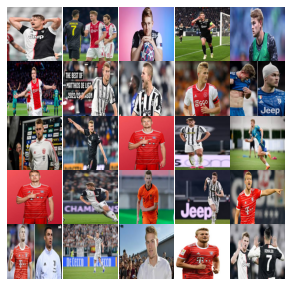

In [6]:
showImages('A', 'Netherlands', 'Matthijs de Ligt')

In [6]:
df_team_data

,team,players_used,avg_age,possession,games,games_starts,minutes,minutes_90s,goals,assists,goals_pens,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xg_assist,npxg_xg_assist,xg_per90,xg_assist_per90,xg_xg_assist_per90,npxg_per90,npxg_xg_assist_per90,gk_games,gk_games_starts,gk_minutes,gk_goals_against,gk_goals_against_per90,gk_shots_on_target_against,gk_saves,gk_save_pct,gk_wins,gk_ties,gk_losses,gk_clean_sheets,gk_clean_sheets_pct,gk_pens_att,gk_pens_allowed,gk_pens_saved,gk_pens_missed,gk_pens_save_pct,gk_free_kick_goals_against,gk_corner_kick_goals_against,gk_own_goals_against,gk_psxg,gk_psnpxg_per_shot_on_target_against,gk_psxg_net,gk_psxg_net_per90,gk_passes_completed_launched,gk_passes_launched,gk_passes_pct_launched,gk_passes,gk_passes_throws,gk_pct_passes_launched,gk_passes_length_avg,gk_goal_kicks,gk_pct_goal_kicks_launched,gk_goal_kick_length_avg,gk_crosses,gk_crosses_stopped,gk_crosses_stopped_pct,gk_def_actions_outside_pen_area,gk_def_actions_outside_pen_area_per90,gk_avg_distance_def_actions,shots,shots_on_target,shots_on_target_pct,shots_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,average_shot_distance,shots_free_kicks,npxg_per_shot,xg_net,npxg_net,passes_completed,passes,passes_pct,passes_total_distance,passes_progressive_distance,passes_completed_short,passes_short,passes_pct_short,passes_completed_medium,passes_medium,passes_pct_medium,passes_completed_long,passes_long,passes_pct_long,pass_xa,xg_assist_net,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes,passes_live,passes_dead,passes_free_kicks,through_balls,passes_switches,crosses,throw_ins,corner_kicks,corner_kicks_in,corner_kicks_out,corner_kicks_straight,passes_offsides,passes_blocked,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,sca_defense,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_defense,tackles,tackles_won,tackles_def_3rd,tackles_mid_3rd,tackles_att_3rd,dribble_tackles,dribbles_vs,dribble_tackles_pct,dribbled_past,blocks,blocked_shots,blocked_passes,interceptions,tackles_interceptions,clearances,errors,touches,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,miscontrols,dispossessed,passes_received,progressive_passes_received,minutes_per_game,minutes_pct,minutes_per_start,games_complete,games_subs,minutes_per_sub,unused_subs,points_per_game,on_goals_for,on_goals_against,plus_minus,plus_minus_per90,on_xg_for,on_xg_against,xg_plus_minus,xg_plus_minus_per90,cards_yellow_red,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,Argentina,24,28.4,57.4,7,77,690,7.7,15,8,11,4,5,17,0,1.96,1.04,3.00,1.43,2.48,15.2,11.4,7.8,19.3,1.98,1.02,3.00,1.49,2.51,7,7,690,8,1.04,13,6,53.8,4,2,1,3,42.9,2,2,0,0,0.0,0,0,1,5.4,0.26,-1.6,-0.21,15,78,19.2,147,34,38.8,34.4,39,53.8,46.0,87,12,13.8,4,0.52,12.1,95,41,43.2,12.39,5.35,0.12,0.27,18.3,3,0.12,-0.2,-0.4,3911,4625,84.6,60635,18633,2131,2336,91.2,1453,1636,88.8,233,431,54.1,7.1,0.2,76,242,64,7,217,4237,365,119,10,21,94,151,39,11,17,0,23,62,179,23.35,134,13,6,9,10,7,25,3.26,16,1,3,1,4,0,123,69,70,41,12,59,100,59.0,41,84,14,70,52,175,124,0,5388,352,1424,2716,1293,157,5383,45,112,40.2,99,81,3868,210,99,100,87,41,36,24,66,2.00,15,8,7,0.91,15.2,4.6,10.6,1.38,0,100,115,23,5,2,1,357,83,90,48.0
1,Australia,20,28.7,37.8,4,44,360,4.0,3,3,3,0,0,7,0,0.75,0.75,1.50,0.75,1.50,2.3,2.3,1.9,4.2,0.58,0.48,1.06,0.58,1.06,4,4,360,6,1.50,18,12,66.7,2,0,2,2,50.0,0,0,0,0,-1.0,0,1,0,5.5,0.31,-0.5,-0.13,38,85,44.7,127,13,50.4,38.5,37,56.8,46.2,63,3,4.8,6,1.50,15.5,26,8,30.8,6.50,2.00,0.12,0.38,18.5,0,0.09,0.7,0.7,1254,1696,73.9,22489,8922,546,643,84.9,499,612,81.5,145,306,47.4,1.1,1.1,17,77,15,2,68,1493,202,48,1,13,54,98,8,3,5,0,1,41,